In [6]:
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [5]:
series=pd.read_excel('Data.xlsx')

In [136]:
series.head()

,0
0,0.841471
1,0.873736
2,0.902554
3,0.927809
4,0.949402


In [6]:
series.shape

(106, 4)

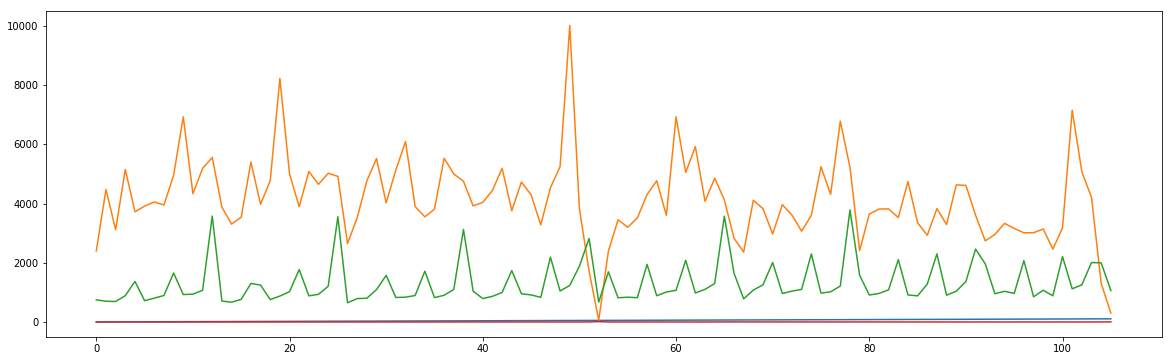

In [7]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()

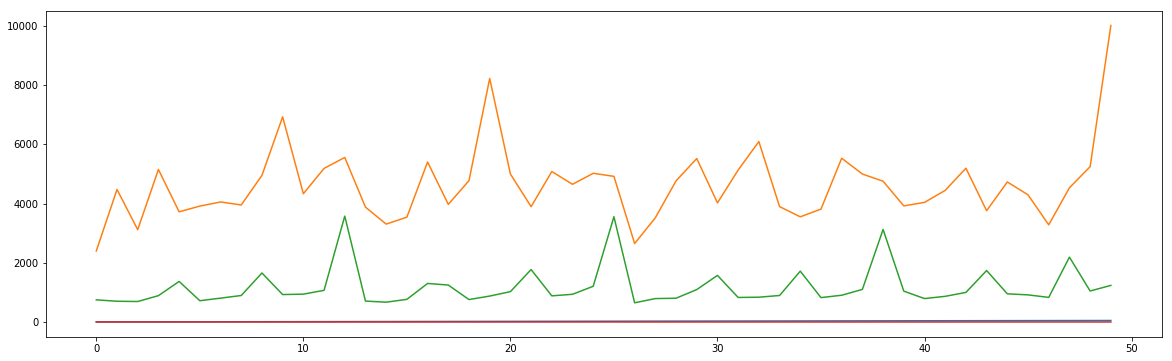

In [8]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values[:50])
pyplot.show()

In [9]:
# normalize features - 

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(series.values)
series = pd.DataFrame(scaled)

In [10]:
window_size = 50

series_s = series.copy()
for i in range(window_size):
    series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)
    
series.dropna(axis=0, inplace=True)

In [11]:
series.head()

,0,1,2,3,0,1,2,3,0,1,...,2,3,0,1,2,3,0,1,2,3
0,-1.000000,-0.529376,-0.936862,-0.965530,-0.980952,-0.112584,-0.966837,-0.991581,-0.961905,-0.385156,...,-0.746173,-0.984356,-0.066667,1.000000,-0.625638,-0.997151,-0.047619,-0.242342,-0.211097,-0.935086
1,-0.980952,-0.112584,-0.966837,-0.991581,-0.961905,-0.385156,-0.972577,-0.980613,-0.942857,0.023200,...,-0.625638,-0.997151,-0.047619,-0.242342,-0.211097,-0.935086,-0.028571,-0.665964,0.386480,-0.741835
2,-0.961905,-0.385156,-0.972577,-0.980613,-0.942857,0.023200,-0.846301,-0.988864,-0.923810,-0.264035,...,-0.211097,-0.935086,-0.028571,-0.665964,0.386480,-0.741835,-0.009524,-1.000000,-0.984694,1.000000
3,-0.942857,0.023200,-0.846301,-0.988864,-0.923810,-0.264035,-0.540179,-0.956007,-0.904762,-0.225269,...,0.386480,-0.741835,-0.009524,-1.000000,-0.984694,1.000000,0.009524,-0.530180,-0.332908,-0.898952
4,-0.923810,-0.264035,-0.540179,-0.956007,-0.904762,-0.225269,-0.955357,-0.987036,-0.885714,-0.197148,...,-0.984694,1.000000,0.009524,-0.530180,-0.332908,-0.898952,0.028571,-0.318068,-0.892219,-0.978081


In [12]:
series.shape

(56, 204)

In [13]:
nrow = round(0.8*series.shape[0])

In [75]:
train = series.iloc[:nrow, :]
test = series.iloc[nrow:,:]

In [76]:
from sklearn.utils import shuffle
train = shuffle(train)

In [77]:
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [78]:
train_X = train_X.values
train_y = train_y.values
test_X = test_X.values
test_y = test_y.values

In [79]:
train_X.shape
train_y.shape
test_X.shape
test_y.shape

(11,)

In [80]:
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)

In [81]:
train_X.shape
train_y.shape
test_X.shape
test_y.shape

(11,)

In [91]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(input_shape = (11,1), output_dim= 11, return_sequences = True))
#model.add(Dropout(0.5))
model.add(LSTM(256))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:

Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(11, 1), return_sequences=True, units=11)`



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 11, 11)            572       
_________________________________________________________________
lstm_22 (LSTM)               (None, 256)               274432    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
_________________________________________________________________
activation_10 (Activation)   (None, 1)                 0         
Total params: 275,261
Trainable params: 275,261
Non-trainable params: 0
_________________________________________________________________


In [88]:
#X = np.reshape(range(30),(3,10)).transpose()

#input_shape = tfidf_matrix[0].shape
start = time.time()
model.fit(train_X,train_y,epochs=3,validation_split=0.2)
print("> Compilation Time : ", time.time() - start)




ValueError: Error when checking input: expected lstm_19_input to have shape (11, 1) but got array with shape (203, 1)

In [87]:
# Doing a prediction on all the test data at once
preds = model.predict(test_X)

ValueError: Error when checking input: expected lstm_19_input to have shape (11, 1) but got array with shape (203, 1)

In [67]:
preds.reshape(-1, 1)
preds = scaler.inverse_transform(preds)

ValueError: non-broadcastable output operand with shape (11,1) doesn't match the broadcast shape (11,4)

In [66]:
actuals = scaler.inverse_transform(test_y)
#actuals = test_y

ValueError: Expected 2D array, got 1D array instead:
array=[-0.96648614 -0.90221314 -0.97039639 -0.96055387 -0.95746391 -0.9011695
 -0.99157403 -0.97624152 -0.93757243 -0.76049666 -0.42261335].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [54]:
mean_squared_error(actuals,preds)

NameError: name 'actuals' is not defined

In [64]:
pyplot.plot(actuals)

pyplot.plot(preds)
pyplot.show()

NameError: name 'actuals' is not defined

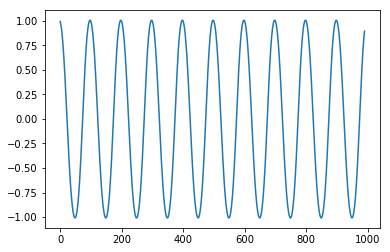

In [99]:
pyplot.plot(preds)
pyplot.show()

In [61]:
def moving_test_window_preds(n_future_preds):

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    preds_moving = []                                    # Use this to store the prediction made on each test window
    moving_test_window = [test_X[0,:].tolist()]          # Creating the first test window
    moving_test_window = np.array(moving_test_window)    # Making it an numpy array
    
    for i in range(n_future_preds):
        preds_one_step = model.predict(moving_test_window) # Note that this is already a scaled prediction so no need to rescale this
        preds_moving.append(preds_one_step[0,0]) # get the value from the numpy 2D array and append to predictions
        preds_one_step = preds_one_step.reshape(1,1,1) # Reshaping the prediction to 3D array for concatenation with moving test window
        moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end
        
    preds_moving = scaler.inverse_transform(preds_moving)
    
    return preds_moving
        

In [7]:
preds_moving = moving_test_window_preds(500)

NameError: name 'moving_test_window_preds' is not defined

In [9]:
series=pd.read_csv('Data1.csv')

In [11]:
series1=pd.read_csv('leads_wins.csv')